In [ ]:
import numpy as np
import pandas as pd

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
from PIL import Image
from matplotlib.pyplot import figure

In [ ]:
import numpy as np
import pandas as pd

import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
!kaggle datasets download -d prasanshasatpathy/soil-types

 65% 2.00M/3.08M [00:00<00:00, 2.88MB/s]
100% 3.08M/3.08M [00:00<00:00, 3.56MB/s]


In [ ]:
!unzip /content/soil-types.zip

unzip:  cannot find or open /content/soil-types.zip, /content/soil-types.zip.zip or /content/soil-types.zip.ZIP.


In [ ]:
image_size = 224
batch_size = 16


target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SHAPE = (224, 224)
train_datagen = ImageDataGenerator(rescale=1. / 255.,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        validation_split=0.15)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255., validation_split=0.15)
valid_generator = valid_datagen.flow_from_directory(
   '/content/Soil types',
    subset="validation",
    batch_size = batch_size,
    target_size=IMAGE_SHAPE
)

train_generator = train_datagen.flow_from_directory(
        '/content/Soil types',
        target_size=(224, 224),
        batch_size = batch_size)

Found 21 images belonging to 5 classes.
Found 156 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([

    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
from keras.metrics import Precision , Recall

model.compile(
  optimizer=optimizer,
  loss='categorical_crossentropy',
  metrics=['accuracy',Precision(),Recall()])

In [ ]:
# total_sample = train_generator.n
# n_epochs = 36
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('best_model.hdf5', monitor = 'val_accuracy', verbose = 1, save_best_only = True)

In [ ]:
history = model.fit(
        train_generator,
        epochs = 10,
        validation_data= valid_generator,
        callbacks = [checkpoint])

Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.1878 - accuracy: 0.9359 - precision: 0.9355 - recall: 0.9295
Epoch 1: val_accuracy did not improve from 1.00000
10/10 [==============================] - 11s 1s/step - loss: 0.1878 - accuracy: 0.9359 - precision: 0.9355 - recall: 0.9295 - val_loss: 0.1245 - val_accuracy: 0.9524 - val_precision: 1.0000 - val_recall: 0.9048
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.3999 - accuracy: 0.8910 - precision: 0.8940 - recall: 0.8654
Epoch 2: val_accuracy did not improve from 1.00000
10/10 [==============================] - 8s 717ms/step - loss: 0.3999 - accuracy: 0.8910 - precision: 0.8940 - recall: 0.8654 - val_loss: 0.1874 - val_accuracy: 0.9048 - val_precision: 0.9500 - val_recall: 0.9048
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.2309 - accuracy: 0.9295 - precision: 0.9533 - recall: 0.9167
Epoch 3: val_accuracy did not improve from 1.00000
10/10 [=======================

In [ ]:
import matplotlib.pyplot as plt

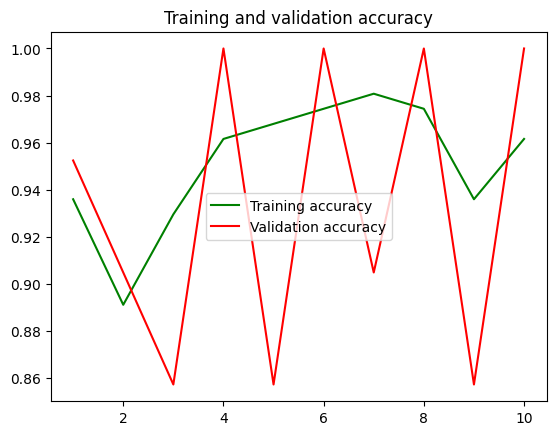

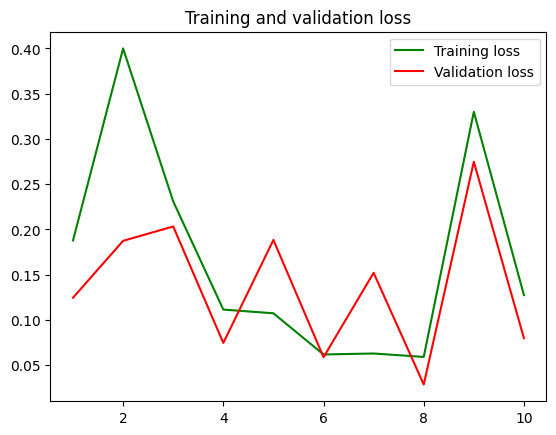

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
class_names = sorted(os.listdir('/content/Soil types'))
class_names

['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil']

In [ ]:
preds = sorted(os.listdir('/content/Soil types'))
preds_idx = [0,1,2,3,4]
preds = dict(zip(preds_idx,preds))
preds

{0: 'Black Soil',
 1: 'Cinder Soil',
 2: 'Laterite Soil',
 3: 'Peat Soil',
 4: 'Yellow Soil'}

1/1 [==============================] - 0s 50ms/step
True Label: Cinder Soil
Prediction: [[8.8286854e-04 9.8792422e-01 4.7841522e-06 1.1184083e-02 3.8898074e-06]]


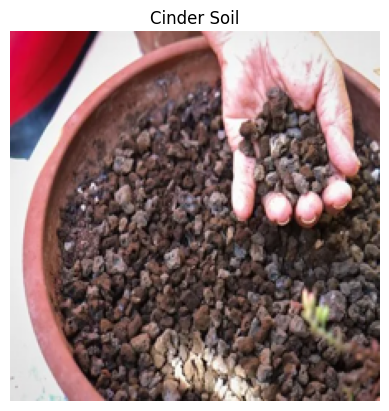

In [ ]:

img = Image.open('/content/potting-mix-cinder-500x500.webp')

# Resize the image to the model's input size (228x228)
img = img.resize((224, 224))

# Convert the image to a numpy array and normalize the pixel values
img_array = np.array(img) / 255.0

# Add a batch dimension to the array
img_array = np.expand_dims(img_array, axis=0)

# Make the prediction
pred = model.predict(img_array)

# Get the true label
true_label = np.argmax(pred)

# Print the true label name
print('True Label:', class_names[true_label])

# Show the image and the prediction
plt.axis("off")
plt.imshow(img)
plt.title(class_names[true_label])
print('Prediction:', pred)

In [ ]:
model.save('soil_model3.h5')

In [ ]:
model.save(filepath="save_model/")

In [ ]:
from tensorflow.keras.models import load_model
plant = load_model('soil_model3.h5')

In [ ]:
def eval_model(model):
    class_names = ['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil']
    val_gen= valid_datagen.flow_from_directory(
                    directory='/content/Soil types',
                    target_size = (224,224),
                    shuffle = False,
                    classes=class_names , # classes to predict
                    seed=43 ,# to make the result reproducible
                    subset = "validation")

    model_preds = model.predict(val_gen)
    predicted_labels = np.argmax(model_preds, axis=1)
    classes = val_gen.classes

   # list of target class names
    print(classification_report(predicted_labels,classes))


    cm = confusion_matrix(classes, predicted_labels)

    figure(figsize=(20, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.GnBu)
    plt.title('Confusion matrix',fontsize=15)
    plt.colorbar()
    plt.xticks(range(5),class_names, fontsize=12,rotation=60)
    plt.yticks(range(5),class_names, fontsize=12,verticalalignment="center")
  # Iteating over cells to write number of prediction for each class
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > np.max(cm)/2. else "black")
    plt.xlabel('Predicted label',fontsize=15)
    plt.ylabel('True label',fontsize=15)

Found 21 images belonging to 5 classes.
1/1 [==============================] - 0s 406ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         4

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



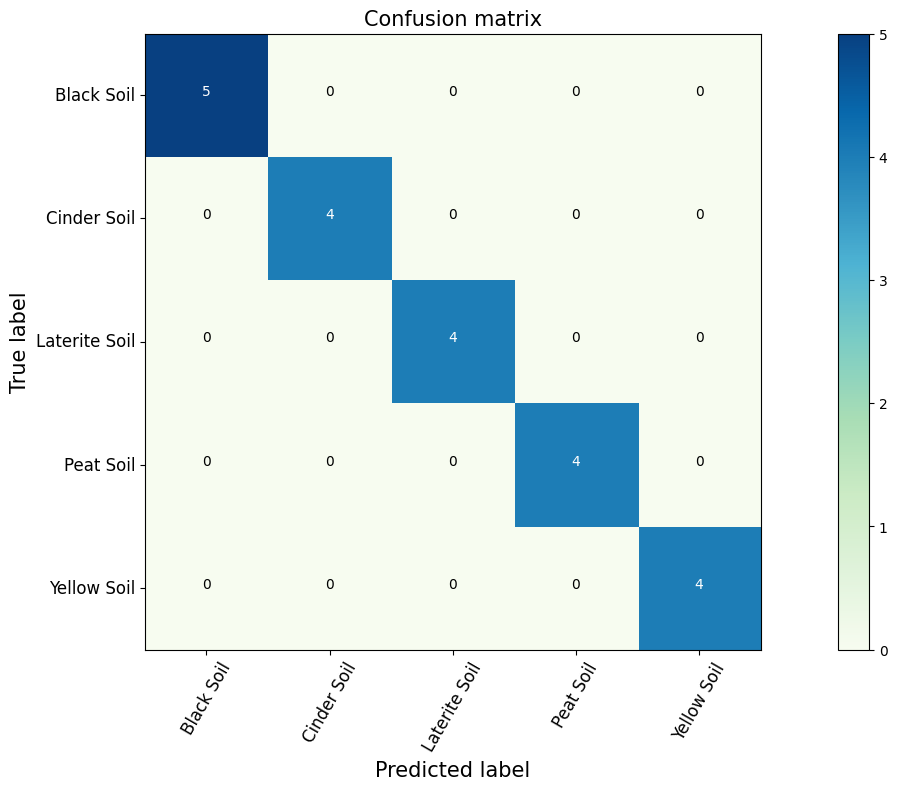

In [ ]:

eval_model(plant)